# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO: Studiare meglio i tagli e vedere poi con gli scatter plot

In [52]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

import warnings
warnings.filterwarnings('ignore')

In [53]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

### Races Clustering

In [54]:
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

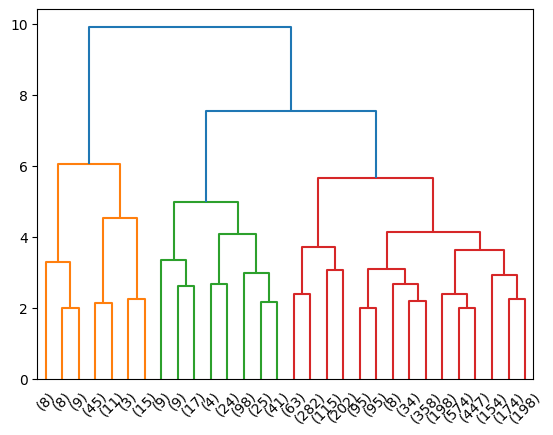

In [55]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [56]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.7467171629399835)

In [57]:
cluster_labels = fcluster(data_link, t=7.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.386369290450654)

<Axes: xlabel='length', ylabel='race_prestige'>

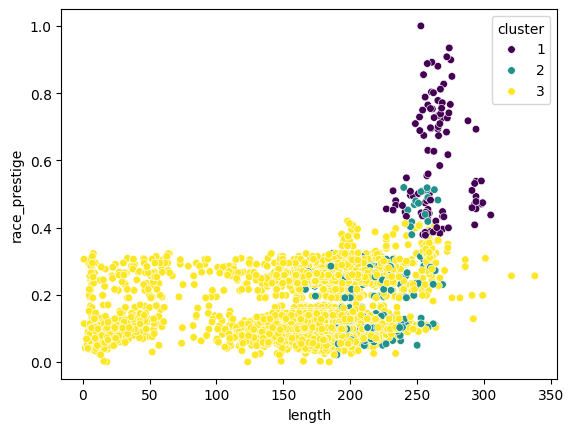

In [58]:
data_for_clustering['cluster'] = cluster_labels
sns.scatterplot(data=data_for_clustering, x='length', y='race_prestige', hue='cluster', palette='viridis', s=30)

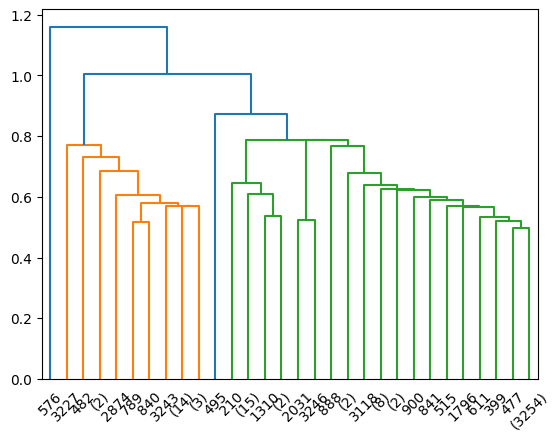

In [59]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [60]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.697550494067927)

In [61]:
cluster_labels = fcluster(data_link, t=0.8, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.5612625677975522)

<Axes: xlabel='length', ylabel='race_prestige'>

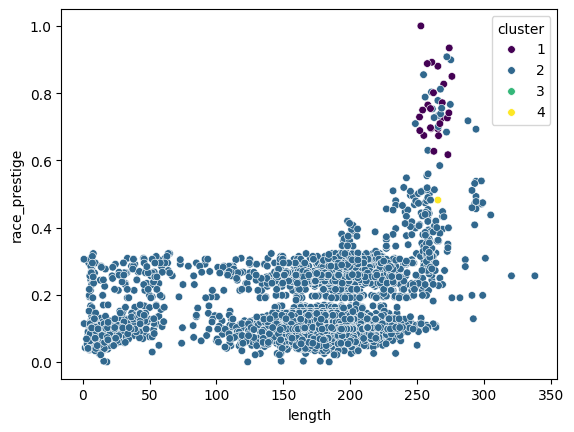

In [62]:
data_for_clustering['cluster'] = cluster_labels
sns.scatterplot(data=data_for_clustering, x='length', y='race_prestige', hue='cluster', palette='viridis', s=30)

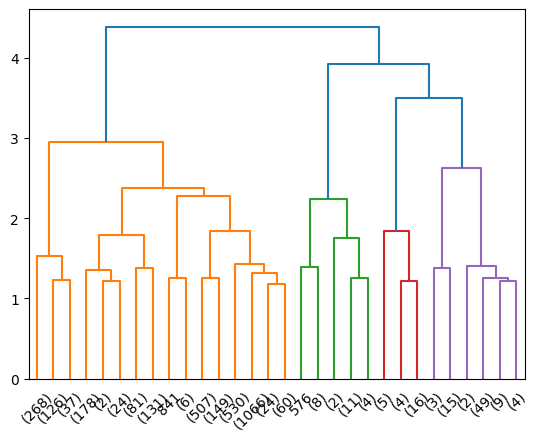

In [63]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [64]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.8076376340826145)

In [65]:
cluster_labels = fcluster(data_link, t=2.8, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.3904265242797588)

<Axes: xlabel='length', ylabel='race_prestige'>

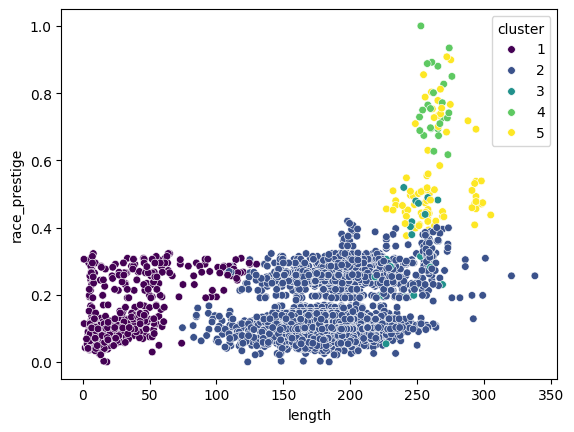

In [66]:
data_for_clustering['cluster'] = cluster_labels
sns.scatterplot(data=data_for_clustering, x='length', y='race_prestige', hue='cluster', palette='viridis', s=30)

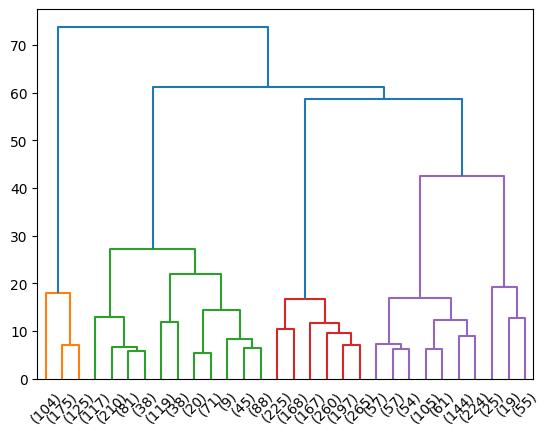

In [67]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [68]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.6074014267869482)

In [69]:
cluster_labels = fcluster(data_link, t=45, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.4078866237140772)

<Axes: xlabel='length', ylabel='race_prestige'>

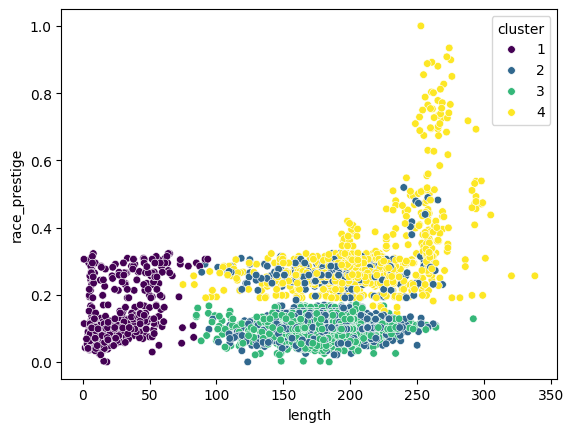

In [70]:
data_for_clustering['cluster'] = cluster_labels
sns.scatterplot(data=data_for_clustering, x='length', y='race_prestige', hue='cluster', palette='viridis', s=30)

### Races-Cyclist Clustering

In [17]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset = dataset[dataset['race_name'] == 'Ronde van Vlaanderen']

In [18]:
# Select relevant columns for clustering
columns_to_use = ['length','race_prestige', 'race_physical_effort', 'cyclist_bmi', 'cyclist_age', 'height', 'cyclist_climb_power', 'position', 'delta']

data_for_clustering = dataset[columns_to_use].dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

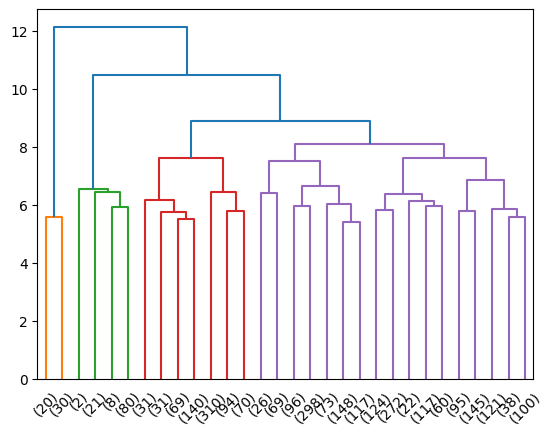

In [19]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [20]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.6415516319866896)

In [21]:
cluster_labels = fcluster(data_link, t=8.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.11701013166964418)

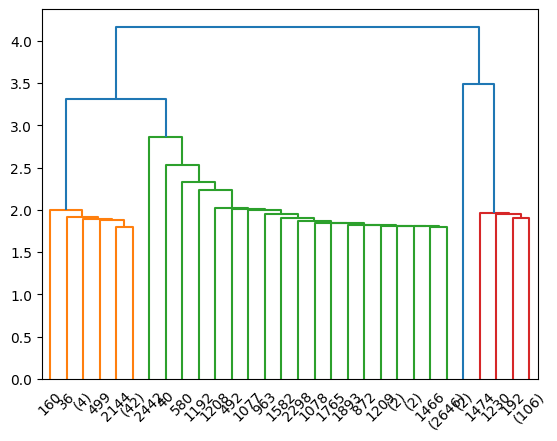

In [22]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [23]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.7428769792703652)

In [24]:
cluster_labels = fcluster(data_link, t=3.2, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.44634918379262395)

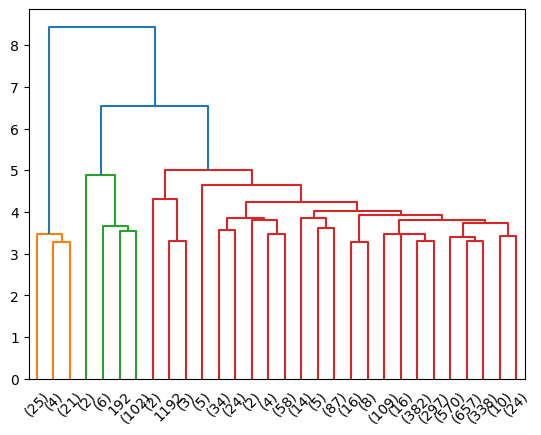

In [25]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [26]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.8205786054805961)

In [27]:
cluster_labels = fcluster(data_link, t=5.5, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)

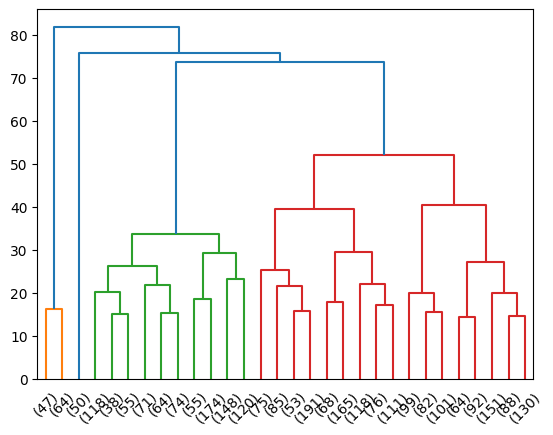

In [28]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [29]:
c, _ = cophenet(data_link, data_dist)
c

np.float64(0.4938879005903758)

In [30]:
cluster_labels = fcluster(data_link, t=75, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.45465956961053805)